![](https://manavrachna.edu.in/wp-content/uploads/2022/08/big-data-center-analyzes-data-science-background-presentation-big-data-center-analyzes-data-science-background-159196598.jpg)

In [ ]:
# Install the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data using pandas
data=pd.read_csv('/kaggle/input/aiml-youtube-channels-content-2018-2019/AI_ML_YT_Videos.csv')
data.head()

,Unnamed: 0,Channel,Title,PublishedDate,Views,Likes,Comments
0,0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [3]:
# Remove the unwanted columns in the data
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [4]:
# Checking the data shape
data.shape

(6151, 6)

In [5]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Channel        6151 non-null   object
 1   Title          6151 non-null   object
 2   PublishedDate  6151 non-null   object
 3   Views          6151 non-null   int64 
 4   Likes          6151 non-null   int64 
 5   Comments       6151 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 288.5+ KB


In [6]:
# Checking the if the data have contains the null values
data.isna().sum()/len(data)*100

Channel          0.0
Title            0.0
PublishedDate    0.0
Views            0.0
Likes            0.0
Comments         0.0
dtype: float64

In [7]:
# Checking the duplicate values in the data
dupicate_valeus=data.duplicated().sum()
print(f'The data contains the {dupicate_valeus}')

The data contains the 0


In [8]:
# Some basics stastical Analysis
data.describe().style.background_gradient(cmap='ocean')

,Views,Likes,Comments
count,6151.000000,6151.000000,6151.000000
mean,52208.953016,935.637132,72.171029
std,118031.753789,2243.596155,144.250349
min,0.000000,0.000000,0.000000
25%,5017.500000,83.000000,7.000000
50%,16606.000000,313.000000,27.000000
75%,52116.500000,926.000000,80.000000
max,2689040.000000,64750.000000,3478.000000


## Explore Data Analysis 

In [9]:
data.head(1)

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1


##  Questions Asked from the data
* Identify and determine the YouTube channel renowned for educational content on artificial intelligence or data science.
* Identify the most frequently occurring concepts in videos and list the top 10 with the highest repetition
*  Identify and analyze the available options or features related to views in the dataset.
* Compile a list of the top 10 YouTube channels along with their respective views based on the dataset.


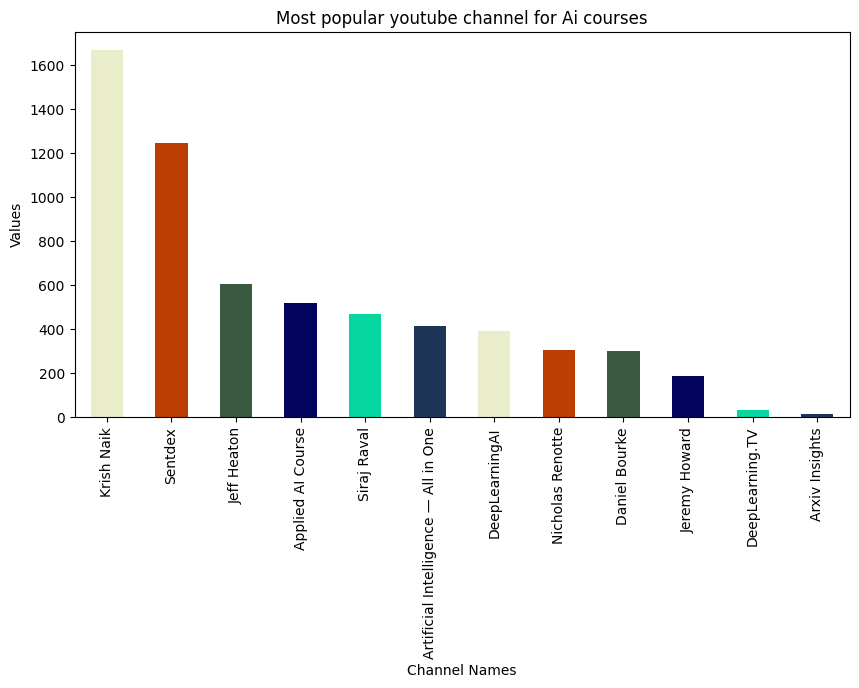

In [10]:
# Let's find the most demanding youtube channel
data['Channel'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#e9edc9','#bb3e03','#3a5a40','#03045e','#06d6a0','#1d3557'])
plt.title("Most popular youtube channel for Ai courses")
plt.xlabel("Channel Names")
plt.ylabel("Values")
plt.show()

In [11]:
# Hear is the most popular topics and repeted topic in the youtube channels
pd.DataFrame(data['Title'].value_counts().head(10))

,count
Title,
Live Q&A Data Science,5
Kaggle Challenge (LIVE),3
Live Q&A- Ask Anything Related Data Science,3
Quantum Machine Learning (LIVE),3
LIVE: Machine Learning projects for your career transition (based on your current role),2
Are courses enough for a job? | Machine learning engineer livestream Q&A,2
Various Roles and Responsibilities in Data Science,2
The Trust That Binds,2
Introduction to PyTorch for Deep Learning with Python (3.2),2


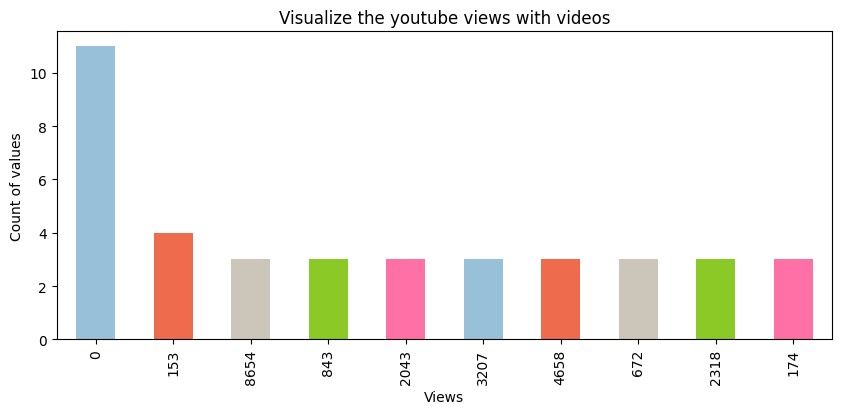

In [12]:
data['Views'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,4),color=['#98c1d9','#ee6c4d','#ccc5b9','#8ac926','#ff70a6'])
plt.title("Visualize the youtube views with videos")
plt.xlabel("Views")
plt.ylabel("Count of values")
plt.show()

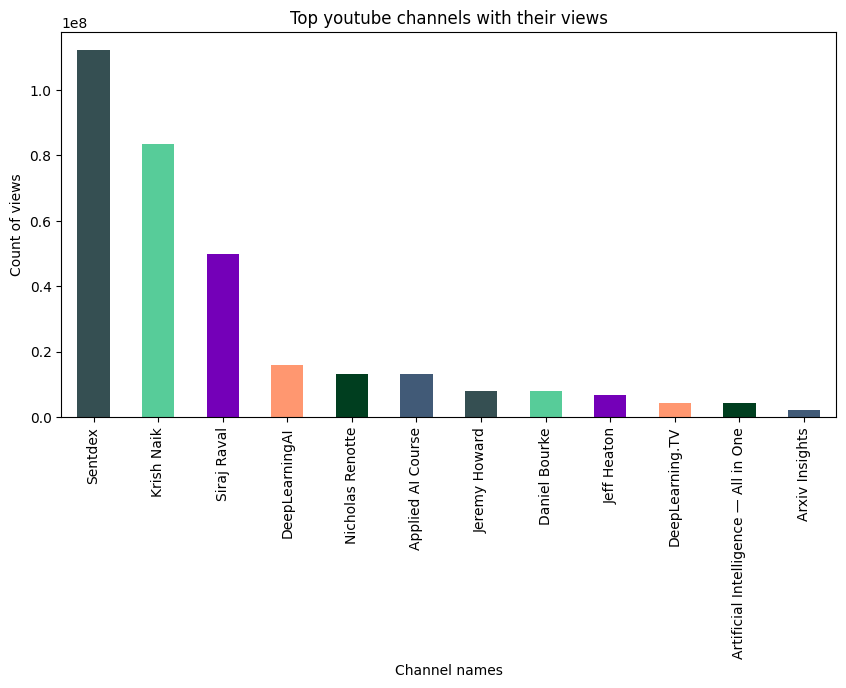

In [13]:
# Calculate the total views with the 
data.groupby('Channel')['Views'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#354f52','#57cc99','#7400b8','#ff9770','#003e1f','#415a77'])
plt.title("Top youtube channels with their views")
plt.xlabel("Channel names")
plt.ylabel("Count of views")
plt.show()

# Observations
* Krish Naik's channel is the most popular channel for data science in the dataset.

* Live questions related to data science and Kaggle challenges are repeated concepts.

* Videos with 0 views have been repeated more times compared to others.

* Sentdex's YouTube channel has the highest views, followed by Krish Naik, who takes the second place.

## Again some basic question asked from the data
* Identify the most-viewed channel and create a new column categorizing followers into high, medium, and low.
* Analyze the dataset to find the day when the most videos were posted.
* Compile a list of the top 10 videos with the highest views based on their titles.
* Determine the YouTube channel with the highest comment count.
* Identify the video that has received the highest number of comments.
* Compile a list of the top 10 most viewed videos for both Sentdex and Krish Naik.

In [14]:
# Create a new column to find the most views youtube channels
channel_views=pd.DataFrame(data.groupby('Channel')['Views'].sum().sort_values(ascending=False))
def find_channel(channel):
    if channel >= 50000000:
        return 'Most views channel'
    if 500000 < channel < 50000000:
        return 'Channel with medium followers'
    elif channel <= 3000000:
        return 'Channel with less followers'
channel_views['Channel_categorys']=channel_views.apply(lambda row: find_channel(row['Views']), axis=1)
channel_views.style.background_gradient(cmap='RdYlGn')

,Views,Channel_categorys
Channel,,
Sentdex,112159185,Most views channel
Krish Naik,83635593,Most views channel
Siraj Raval,49804096,Channel with medium followers
DeepLearningAI,15875334,Channel with medium followers
Nicholas Renotte,13255443,Channel with medium followers
Applied AI Course,13194574,Channel with medium followers
Jeremy Howard,7894444,Channel with medium followers
Daniel Bourke,7857301,Channel with medium followers
Jeff Heaton,6600032,Channel with medium followers


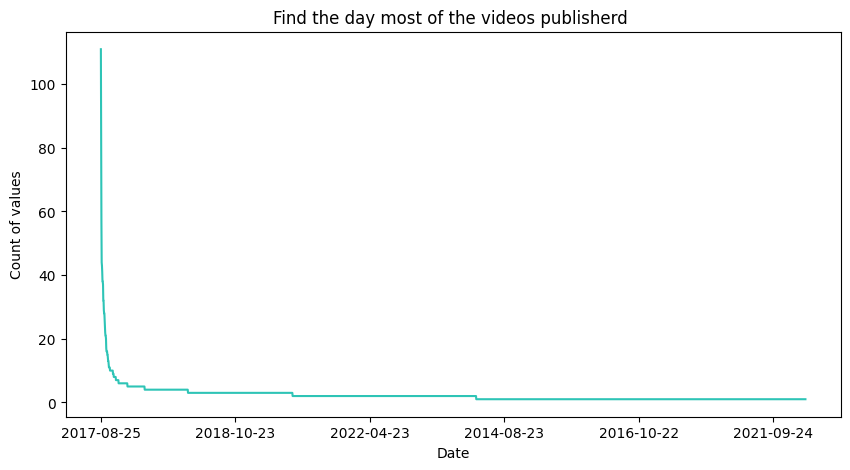

In [15]:
# Let's find the which date most videos published
data['PublishedDate'].value_counts()\
.plot(kind='line',color=['#2ec4b6'],figsize=(10,5))
plt.title("Find the day most of the videos publisherd ")
plt.xlabel('Date')
plt.ylabel('Count of values')
plt.show()

In [16]:
# Top 10 Vidoes highest views in the title
top_10_most_wacthed_videos=pd.DataFrame(data.groupby('Title')['Views'].sum().sort_values(ascending=False).head(10))
top_10_most_wacthed_videos.style.background_gradient(cmap='bwr_r')

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
Prakhar Raj Become Data Scientist at Simpl | Data Scientist Interview | Applied Ai Course Reviews,1605793
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
I Built a Trading Bot with ChatGPT,1538575
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
YOLO Object Detection (TensorFlow tutorial),1340082


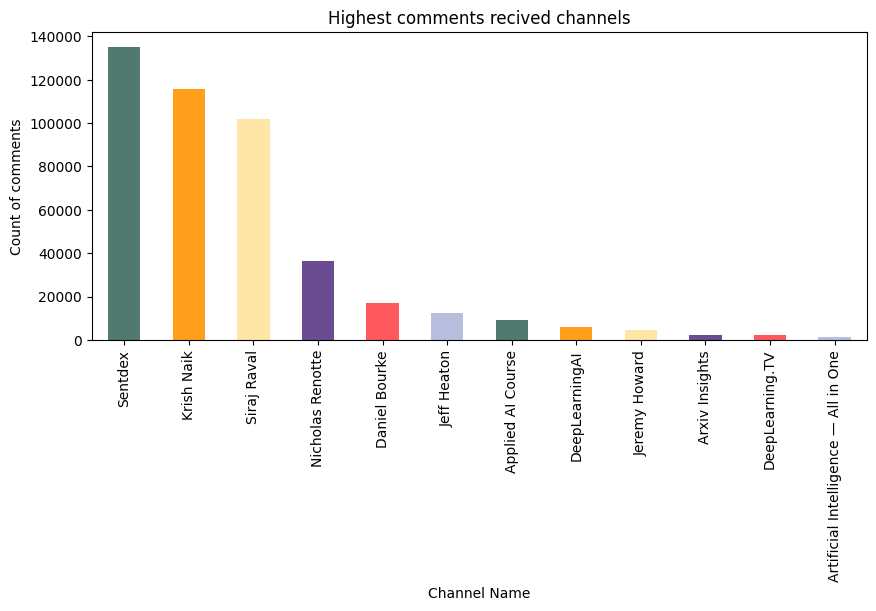

In [17]:
# Which channel recived highest comments
data.groupby('Channel')['Comments'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,4),color=['#52796f','#ff9f1c','#ffe6a7','#6a4c93','#ff595e','#b8bedd'])
plt.title("Highest comments recived channels")
plt.xlabel('Channel Name')
plt.ylabel("Count of comments")
plt.show()

In [18]:
# Which video have highest comments
top_10_comments=pd.DataFrame(data.groupby('Title')['Comments'].sum().sort_values(ascending=False).head(10))
top_10_comments.style.background_gradient(cmap='twilight_r')

,Comments
Title,
Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects,3478
Real Time Sign Language Detection with Tensorflow Object Detection and Python | Deep Learning SSD,2603
My Apology,2031
Real Time Face Mask Detection with Tensorflow and Python | Custom Object Detection w/ MobileNet SSD,1808
AI VS ML VS DL VS Data Science,1697
Neural Networks from Scratch - P.1 Intro and Neuron Code,1610
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1518
"Deep Learning with Python, TensorFlow, and Keras tutorial",1480
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1461


In [19]:
# Let's find top 10 most viewed videos for Sentdex
sentdex=data['Channel']=='Sentdex'
top_10_sentdex=pd.DataFrame(data.loc[sentdex].groupby('Title')['Views'].sum().sort_values(ascending=False).head(10))
top_10_sentdex.style.background_gradient(cmap='gnuplot2_r')

,Views
Title,
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
"Deep Learning with Python, TensorFlow, and Keras tutorial",1239057
Neural Networks from Scratch - P.1 Intro and Neuron Code,1221616
How to download and install Python Packages and Modules with Pip,1096700
Introduction - Django Web Development with Python 1,1084268
Game Development in Python 3 With PyGame - 1 - Intro,947122
"Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2",847508


In [20]:
# Let's Find the top 10 most viewed videos for Krish naik
krish_naik=data['Channel']=='Krish Naik'
top_10_videos=pd.DataFrame(data.loc[krish_naik].groupby('Title')['Views'].sum().sort_values(ascending=False).head(10))
top_10_videos.style.background_gradient(cmap='ocean_r')

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
OTT Platform For Education OneNeuron- Education As A Service,736171
Negotiating Salaries With HR for Any Job Is An Art. Learn IT Before It's Late 😭😭😭😭,701980
Complete Road Map To Prepare NLP-Follow This Video-You Will Able to Crack Any DS Interviews🔥🔥,626078
Live- Implementation of End To End Kaggle Machine Learning Project With Deployment,586459
How To Learn Data Science by Self Study and For Free,538796
Live Day 1- Introduction To statistics In Data Science,491223


## Observations:
* Krish Naik and Sentdex YouTube channels have more followers compared to other channels.

* Most videos were uploaded on August 25, 2017.

* The video "AI VS ML VS DL VS Data Science" has the highest number of views.

* Sentdex's YouTube channel has the highest number of comments, followed by Krish Naik.

* The video "Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects" has the highest number of comments.

* In Sentdex's "Practical Machine Learning Tutorial with Python Intro p.1" video has the highest number of views.

* In Krish Naik's "AI VS ML VS DL VS Data Science" video has the highest number of views.

In [21]:
data.head(1)

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1


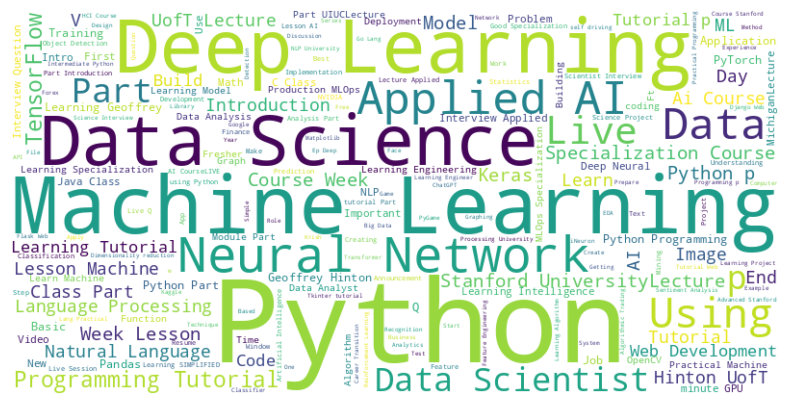

In [22]:
# Some most used title  visualization with using the wordcloud generator
from wordcloud import WordCloud
text=''.join(i for i in data['Title'])
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

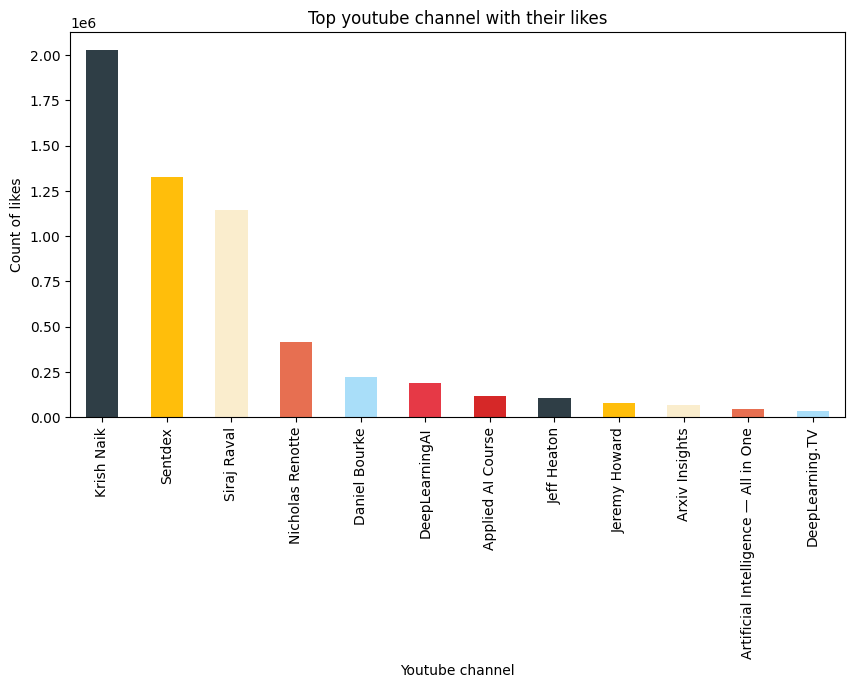

In [27]:
# Find the top  youtube channel with high likes
data.groupby('Channel')['Likes'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#2f3e46','#ffbe0b','#faedcd','#e76f51','#a9def9','#e63946','#d62828'])
plt.title("Top youtube channel with their likes")
plt.xlabel("Youtube channel")
plt.ylabel("Count of likes")
plt.show()

# Thank you